<a href="https://colab.research.google.com/github/Kseniya74/Prof_activity_workshop/blob/main/2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 2.5**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test_final.csv to test_final.csv
Saving train_final.csv to train_final.csv


## **Считывание данных**

In [ ]:
train = pd.read_csv("train_final.csv")

print(f"Размер датасета train: {train.shape}")

Размер датасета train: (44638, 29)


In [ ]:
test = pd.read_csv("test_final.csv")

print(f"Размер датасета train: {test.shape}")

Размер датасета train: (23525, 28)


## **Обработка данных и формирование датасета**


In [ ]:
print("Число пропущенных значений в тренировочном датасете:")
print(train.isna().sum().sum())
print("Число пропущенных значений в тестовом датасете:")
print(test.isna().sum().sum())

Число пропущенных значений в тренировочном датасете:
0
Число пропущенных значений в тестовом датасете:
0


In [ ]:
# Просмотр типов данных в тренировочном датасете
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

#### **Проверка баланса классов**

In [ ]:
train['is_canceled'].value_counts()

0    31354
1    13284
Name: is_canceled, dtype: int64

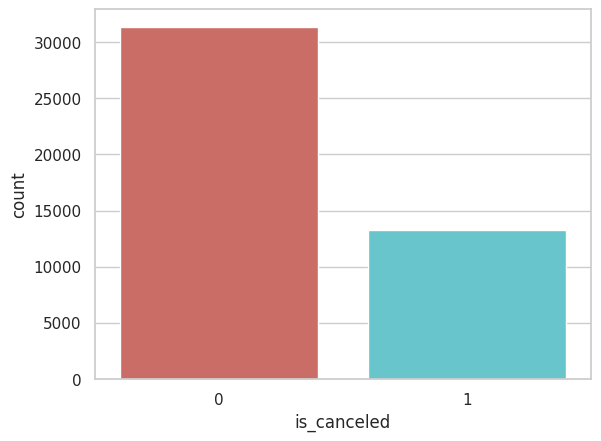

In [ ]:
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
y_data = pd.DataFrame(train['is_canceled'])
sns.countplot(x='is_canceled', data=y_data, palette='hls')
plt.show()

#### **Предобработка данных**

In [ ]:
train.loc[:, train.dtypes == object]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,February,BB,PRT,Direct,Direct,E,F,No Deposit,Transient,2016-02-14
1,City Hotel,November,BB,BEL,Online TA,TA/TO,A,A,No Deposit,Transient,2016-10-09
2,City Hotel,September,BB,ITA,Online TA,TA/TO,F,F,No Deposit,Contract,2015-09-13
3,City Hotel,December,BB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,2015-12-08
4,City Hotel,September,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,June,BB,JPN,Online TA,TA/TO,D,D,No Deposit,Transient,2017-06-28
44634,Resort Hotel,September,BB,GBR,Online TA,TA/TO,E,F,No Deposit,Transient,2015-10-03
44635,City Hotel,April,SC,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2017-02-09
44636,City Hotel,September,HB,NOR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,2016-09-12


In [ ]:
train.loc[:, train.dtypes == object].columns

Index(['market_segment', 'distribution_channel', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'customer_type',
       'reservation_status_date'],
      dtype='object')

In [ ]:
test.loc[:, train.dtypes == object]

,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Online TA,TA/TO,A,A,No Deposit,Transient,2016-06-12
1,Online TA,TA/TO,A,A,No Deposit,Transient,2015-10-31
2,Online TA,TA/TO,A,A,No Deposit,Transient,2016-09-29
3,Direct,Direct,B,B,No Deposit,Transient,2016-08-29
4,Groups,Corporate,A,A,No Deposit,Transient-Party,2016-09-14
...,...,...,...,...,...,...,...
23520,Offline TA/TO,TA/TO,A,A,No Deposit,Transient,2016-05-29
23521,Corporate,Corporate,A,A,No Deposit,Transient,2016-11-04
23522,Corporate,Corporate,A,A,No Deposit,Transient,2016-05-18
23523,Groups,TA/TO,A,A,No Deposit,Transient-Party,2017-01-11


In [102]:
train = train.drop(columns=['reservation_status_date', 'country', 'assigned_room_type', 'reserved_room_type'])
test = test.drop(columns=['reservation_status_date', 'country', 'assigned_room_type', 'reserved_room_type'])

In [103]:
label_encoder = preprocessing.LabelEncoder()

label_encoder.fit(train['arrival_date_month'])

train['arrival_date_month'] = label_encoder.transform(train['arrival_date_month'])
test['arrival_date_month'] = label_encoder.transform(test['arrival_date_month'])

train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,3,2016,3,7,12,0,2,2,...,0,0,0,0,0,0,2,81.0,1,0
1,0,1,50,2016,9,47,18,1,2,2,...,0,0,0,0,0,0,2,93.6,0,2
2,0,0,14,2015,11,37,7,1,5,2,...,0,0,0,0,0,0,0,166.0,0,3
3,0,0,18,2015,2,50,6,2,0,2,...,0,0,0,0,0,0,2,107.0,0,0
4,0,1,263,2016,11,40,29,2,4,2,...,0,0,0,0,0,0,2,100.3,0,0


In [104]:
categories = ['market_segment', 'customer_type', 'meal', 'distribution_channel']

for col in categories:
  label_encoder = preprocessing.LabelEncoder()
  train[col] = label_encoder.fit_transform(train[col])
  test[col] = label_encoder.fit_transform(test[col])

train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,3,2016,3,7,12,0,2,2,...,0,0,0,0,0,0,2,81.0,1,0
1,0,1,50,2016,9,47,18,1,2,2,...,0,0,0,0,0,0,2,93.6,0,2
2,0,0,14,2015,11,37,7,1,5,2,...,0,0,0,0,0,0,0,166.0,0,3
3,0,0,18,2015,2,50,6,2,0,2,...,0,0,0,0,0,0,2,107.0,0,0
4,0,1,263,2016,11,40,29,2,4,2,...,0,0,0,0,0,0,2,100.3,0,0


In [105]:
train = pd.get_dummies(train, columns=['hotel', 'market_segment', 'deposit_type'])

train.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,deposit_type_0,deposit_type_1,deposit_type_2
0,0,3,2016,3,7,12,0,2,2,0.0,...,0,0,0,1,0,0,0,1,0,0
1,1,50,2016,9,47,18,1,2,2,0.0,...,0,0,0,0,0,0,1,1,0,0
2,0,14,2015,11,37,7,1,5,2,2.0,...,0,0,0,0,0,0,1,1,0,0
3,0,18,2015,2,50,6,2,0,2,0.0,...,0,0,0,0,0,0,1,1,0,0
4,1,263,2016,11,40,29,2,4,2,0.0,...,0,0,0,0,0,0,1,1,0,0


In [ ]:
train.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
days_in_waiting_list              

In [115]:
test = pd.get_dummies(test, columns=['hotel', 'market_segment', 'deposit_type'])

test.head()

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_0,market_segment_1,market_segment_2,market_segment_3,market_segment_4,market_segment_5,market_segment_6,deposit_type_0,deposit_type_1,deposit_type_2
0,73,2016,5,28,6,0,2,1,0.0,0,...,0,0,0,0,0,0,1,1,0,0
1,37,2015,10,43,24,2,5,1,1.0,0,...,0,0,0,0,0,0,1,1,0,0
2,190,2017,0,14,6,2,3,2,0.0,0,...,0,0,0,0,0,0,1,1,0,0
3,287,2016,1,35,24,1,4,2,0.0,0,...,0,0,0,1,0,0,0,1,0,0
4,386,2016,10,43,20,1,3,2,0.0,0,...,0,0,0,0,1,0,0,1,0,0


#### **Обучение модели**

In [116]:
X = train.drop(columns=['is_canceled'])
y = train['is_canceled']

In [117]:
print(f"Размер вектора признаков: {X.shape}")
print(f"Размер вектора ответов: {y.shape}")

Размер вектора признаков: (44638, 33)
Размер вектора ответов: (44638,)


## **Обучение модели с помощью метода отложенной выборки**

In [118]:
model = LogisticRegression()
model.fit(X, y)
ans_pred = model.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [119]:
print(f'Accuracy: {accuracy_score(y, ans_pred)}')
print(f'Precision: {precision_score(y, ans_pred)}')
print(f'Recall: {recall_score(y, ans_pred)}')

Accuracy: 0.8029257583225055
Precision: 0.7877388739258689
Recall: 0.4623607347184583


In [121]:
test.shape

(23525, 33)

In [120]:
y_pred_test = model.predict(test)

In [122]:
y_pred_test

array([0, 0, 1, ..., 0, 0, 0])

In [123]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['is_canceled'])
y_pred_test = y_pred_test.reset_index()

y_pred_test.to_csv("predict.csv", index=False)

files.download("predict.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>